# Regularization
    Regularization helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms.

# Why Regularisation

1. Overfitting
2. Overfitting with linear models
3. Regularization of linear models
4. Regularized regression in scikit-learn
5. Comparing regularized linear models with unregularized linear models

## Part 1: Overfitting

**What is overfitting?**

- Building a model that matches the training data "too closely".
- Learning from the error/distrubance/noise in the data, rather than just the truevalues/signal.

**How does overfitting occur?**

- Evaluating a model by testing it on the same data that was used to train it.
- Creating a model that is "too complex".

**What is the impact of overfitting?**

- Model will do well on the training data, but won't generalize to out-of-sample data i.e., test 
- Model will have low bias, but high variance.

## Part 2: Overfitting with linear models

**What are the general characteristics of linear models?**

- Low model complexity
- High bias, low variance
- Generally, Does not tend to overfit

there is always a chance for **overfitting and it can still occur** with linear models if you allow them to have **high variance**. <br>Some common causes are:

### Cause 1: Irrelevant features

Linear models can overfit if we include "irrelevant features", meaning features that are unrelated to the response. Why?

Because it will learn a coefficient for every feature you include in the model, regardless of whether that feature has the **impact** or the **noise**.

This is especially a problem when **p (number of features) is close to n (number of observations)**, because that model will naturally have high variance.

### Cause 2: Correlated features(Muticollinearity)

Linear models can overfit if the included features are highly correlated with one another. Why?

We use OLS(Ordinary Least Squares ) method (OLS takes some assumptions) [scikit-learn documentation](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares):

  #### "...coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance."

### Cause 3: Large coefficients

Linear models can overfit if the coefficients (after feature standardization) are too large. Why?

Because the **larger** the absolute value of the coefficient, the more **power** it has to change the predicted response, resulting in a higher variance.

## Part 3: Regularization of linear models

- Regularization is a method for "constraining" or "regularizing" the **size of the coefficients**, thus "shrinking" them towards zero.
- It reduces model variance and thus **minimizes overfitting**.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is **more likely to generalize**.

Our aim is to locate the **optimum model complexity**, and thus regularization is useful when we believe our model is too complex.

![Bias-variance tradeoff](bias_variance.png)

### How does regularization work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which **minimizes the residual sum of squares (RSS):**

![Estimating coefficients](estimating_coefficients.png)

For a regularized linear regression model, we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the **number of features**
- $\beta_j$ is a **model coefficient**
- $\alpha$ is a **tuning parameter:**
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

### Lasso and ridge path diagrams

A larger alpha (towards the left of each diagram) results in more regularization:

- **Lasso regression** shrinks coefficients all the way to zero, thus removing them from the model
- **Ridge regression** shrinks coefficients toward zero, but they rarely reach zero

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Path Diagrams](lasso_ridge_path.png)



### How should we choose between Lasso regression and Ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- If model performance is your primary concern, it is best to try both.
- ElasticNet regression is a combination of lasso regression and ridge Regression.

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

### Visualizing regularization

Below is a visualization of what happens when you apply regularization. The general idea is that you are **restricting the allowed values of your coefficients** to a certain "region". **Within that region**, you want to find the coefficients that result in the best model.

![Lasso and Ridge Coefficient Plots](lasso_ridge_coefficients.png)

In this diagram:

- We are fitting a linear regression model with **two features**, $x_1$ and $x_2$.
- $\hat\beta$ represents the set of two coefficients, $\beta_1$ and $\beta_2$, which minimize the RSS for the **unregularized model**.
- Regularization restricts the allowed positions of $\hat\beta$ to the **blue constraint region:**
    - For lasso, this region is a **diamond** because it constrains the absolute value of the coefficients.
    - For ridge, this region is a **circle** because it constrains the square of the coefficients.
- The **size of the blue region** is determined by $\alpha$, with a smaller $\alpha$ resulting in a larger region:
    - When $\alpha$ is zero, the blue region is infinitely large, and thus the coefficient sizes are not constrained.
    - When $\alpha$ increases, the blue region gets smaller and smaller.

In this case, $\hat\beta$ is **not** within the blue constraint region. Thus, we need to **move $\hat\beta$ until it intersects the blue region**, while **increasing the RSS as little as possible.**


## Part 4: Regularized regression in scikit-learn

- Communities and Crime dataset from the UCI Machine Learning Repository: [data](http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data), [data dictionary](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)
- **Goal:** Predict the violent crime rate for a community given socioeconomic and law enforcement data

### Load and prepare the crime dataset

In [1]:
# Importing necessary packages and functions required
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
%matplotlib inline
# for matplotlib graphs to be included in the notebook, next to the code
import seaborn as sns # for visualization
import warnings # to silence warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
# examining the response variable
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

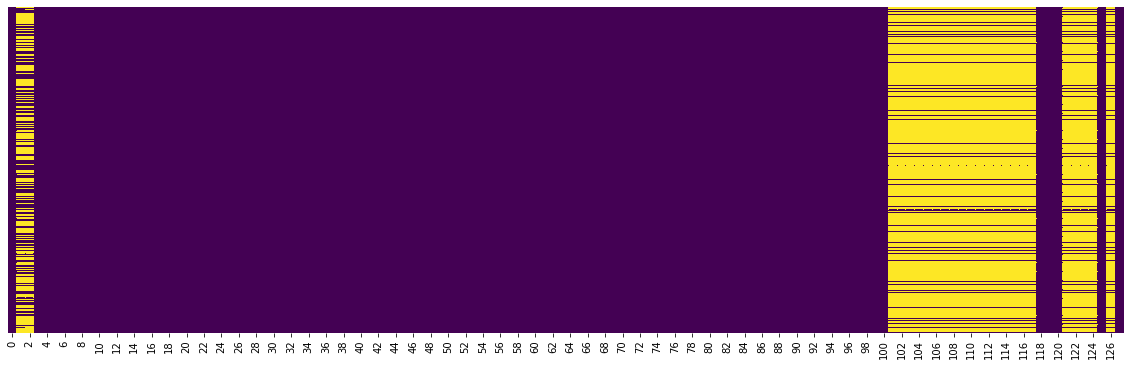

In [4]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [6]:
# remove rows with any missing values
crime.dropna(inplace=True)

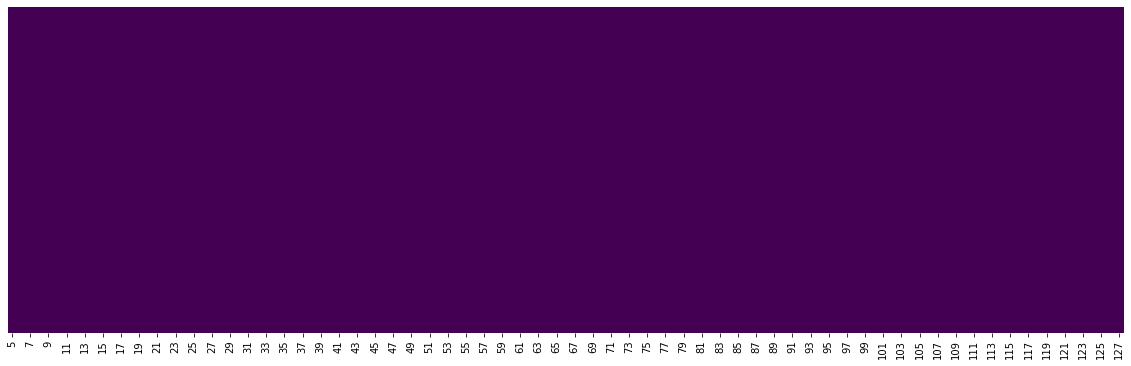

In [7]:
plt.figure(figsize=(20, 6))
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# checking the shape
crime.shape

(319, 123)

In [9]:
# define X and y
X = crime.drop(127, axis=1)
y = crime[127]

In [10]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

### Linear regression

In [11]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  0.9922125287583894
CO-EFFICIENT :  [-3.93018330e+00  7.31324716e-01 -3.01181421e-01 -2.96634778e-01
 -1.83170801e-01  2.81575284e-01 -1.48744636e+00 -4.84695533e-01
  1.24104896e+00 -5.32282788e-01  4.64331123e+00 -1.17079618e-01
  1.04229108e+00  1.36950901e-01 -3.12434116e-01 -1.16489196e+00
  5.37252913e-01  7.49655606e-01 -8.02500871e-02  8.42449509e-01
 -1.98951720e-01 -3.17193999e-01 -4.31217869e-01  1.19357660e-01
 -1.83148129e-01  2.11602690e-01 -1.57441950e-01 -1.03051105e+00
  1.49628176e+00  1.86093900e-01 -1.12289917e+00 -1.13107576e-02
  1.22670519e-01  1.46348876e-01 -1.64172731e-01 -3.73690589e-02
  1.92733806e-01  4.34808503e-01  2.32870361e+00 -5.15176228e-01
  2.64683754e+00 -5.48075999e+00  9.63873430e-01 -1.15021921e+00
 -1.15575665e+00  1.10543276e+00  2.41469970e-01 -6.32209680e-01
  6.01741978e-01  8.37645340e-02  1.05006759e-01 -2.58807800e-01
  5.31513493e-01 -8.57090632e-01 -3.29684470e-01  6.61114510e-01
 -5.61884511e-01  6.27806334e-01  2.798480

In [13]:
# make predictions
y_pred = linreg.predict(X_test)

In [15]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295409056


mean_absolute_error : 0.16725155824888352


mean_squared_error :  0.04986345422693408


root_mean_squared_error :  0.22330126337961922


MSE is more popular than MAE because MSE "eliminates" larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the "y" units.

### Ridge regression

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [16]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.19704456295863382


mean_absolute_error : 0.16725155824816149


mean_squared_error :  0.04986345422665194


root_mean_squared_error :  0.2233012633789875


In [17]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5347697501566349


mean_absolute_error : 0.12769772972161883


mean_squared_error :  0.028890753082631383


root_mean_squared_error :  0.16997280100837128


In [18]:
# examing the coefficients
print(ridgereg.coef_)

[-5.77226675e-03  2.26721774e-02  4.98857382e-02 -6.70174168e-02
 -1.83566112e-02  5.26888536e-02  1.17689929e-02 -5.72468914e-02
  1.52761058e-03  4.29131248e-02  1.04586550e-04 -1.85621890e-02
  5.07008262e-02 -9.63941391e-02 -1.58499805e-01 -3.28082329e-01
 -1.43015949e-02  8.97253556e-02 -1.10520025e-01  8.02961453e-02
 -2.01498712e-02  7.77242382e-03 -8.07823610e-02 -1.39148634e-01
 -1.19008810e-02  1.00148033e-01  3.61850806e-02 -9.71628046e-02
  6.94268658e-02 -8.81688130e-02 -9.79415666e-02 -4.99145470e-03
  1.28541873e-01 -4.15102106e-02 -1.35952164e-01  4.09752240e-02
  7.00727085e-02 -1.86859042e-02  5.95401646e-02  6.28621417e-02
 -3.91478791e-02  8.48551263e-03  7.31545217e-02 -1.28265573e-01
 -1.22240655e-01 -7.02441332e-02 -7.10900893e-02 -6.33671556e-02
  1.01095274e-01 -5.22454503e-02  1.15465301e-01 -7.35016006e-02
 -4.79847841e-03 -1.10878367e-01  6.49567154e-02  4.12339751e-02
 -1.06606017e-02  1.32494298e-03  1.81063822e-02 -1.85567810e-03
 -1.32904914e-02  3.94493

- [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html): ridge regression with built-in cross-validation of the alpha parameter
- **alphas:** array of alpha values to try

In [19]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [20]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [21]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.5318623469518291


mean_absolute_error : 0.13256644483823624


mean_squared_error :  0.02907130253772373


root_mean_squared_error :  0.17050308659295213


### Lasso regression

- [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [22]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.25339884  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.17865705  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.02230294
 -0.          0.          0.          0.          0.0998841  -0.
  0.         -0.          0.01893786 -0.         -0.03169217  0.
  0.         -0.          0.11479343  0.          0.          0.
  0.         -0.16845012 -0.27294066 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.02709397 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.00233805
  0.15404

In [23]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.         -0.04214088  0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.29715868 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.         

In [24]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.3241322659149898


mean_absolute_error : 0.16889755277533727


mean_squared_error :  0.04197132028397072


root_mean_squared_error :  0.20486903202770965


- [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html): lasso regression with built-in cross-validation of the alpha parameter
- **n_alphas:** number of alpha values (automatically chosen) to try

In [25]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  0.002080882923737423


In [26]:
# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.25126823  0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.11419567  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.10231515  0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.12654959
  0.         -0.04766931 -0.38728958 -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.13736646  0. 

In [27]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.551986438475168


mean_absolute_error : 0.13457411347964207


mean_squared_error :  0.027821598419367693


root_mean_squared_error :  0.16679807678557834


# Comparing regularized linear models with unregularized linear models

**Advantages of regularized linear models over linear :**

- Better performance
- L1 regularization performs automatic feature selection
- Useful for high-dimensional problems (p > n)

**Disadvantages of regularized linear models over linear :**

- Tuning is required
- Feature scaling is recommended
- Less interpretable (due to feature scaling)